In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import matplotlib
import requests

from matplotlib import pyplot as plt
from PIL import Image

2023-01-12 15:38:28.132603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 15:38:28.222351: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-12 15:38:28.735907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-12 15:38:28.735942: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [11]:
print(os.getcwd())

/home/lee/Documents/Indian_License_Plate_Recognition


In [20]:
OUTPUT_DIR = 'data/plate_detection'
IMAGE_DIR = 'images/finalImages'
ANNOTATIONS_DIR = os.path.join(OUTPUT_DIR, 'annotations')
LABELS_CSV = os.path.join(OUTPUT_DIR, 'labels.csv')

In [21]:
print(OUTPUT_DIR)
print(IMAGE_DIR)
print(ANNOTATIONS_DIR)
print(LABELS_CSV)

data/plate_detection
images/finalImages
data/plate_detection/annotations
data/plate_detection/labels.csv


In [42]:
import glob
import matplotlib.image as mpimg

IMAGE_PATHS = []
IMAGE_NAMES = []
for filename in glob.glob(os.path.join(IMAGE_DIR, '*.jpg')):
    IMAGE_PATHS.append(mpimg.imread(filename))
    IMAGE_NAMES.append(filename.split('/')[-1])
    
print ('{} images found in {}'.format(len(IMAGE_PATHS), IMAGE_DIR))

940 images found in images/finalImages


In [29]:
%matplotlib inline

def show_images(images, labels, figsize=(15, 5)):
    cols = 4
    rows = len(images) // cols

    image_index = 0
    fig, axarr = plt.subplots(rows, cols, figsize=figsize)
    for r in range(rows):
        for c in range(cols):
            image = images[image_index]
            axarr[r, c].axis("off")
            axarr[r, c].title.set_text(labels[image_index])
            axarr[r, c].imshow(image, cmap='gray')
            image_index += 1

    plt.show()

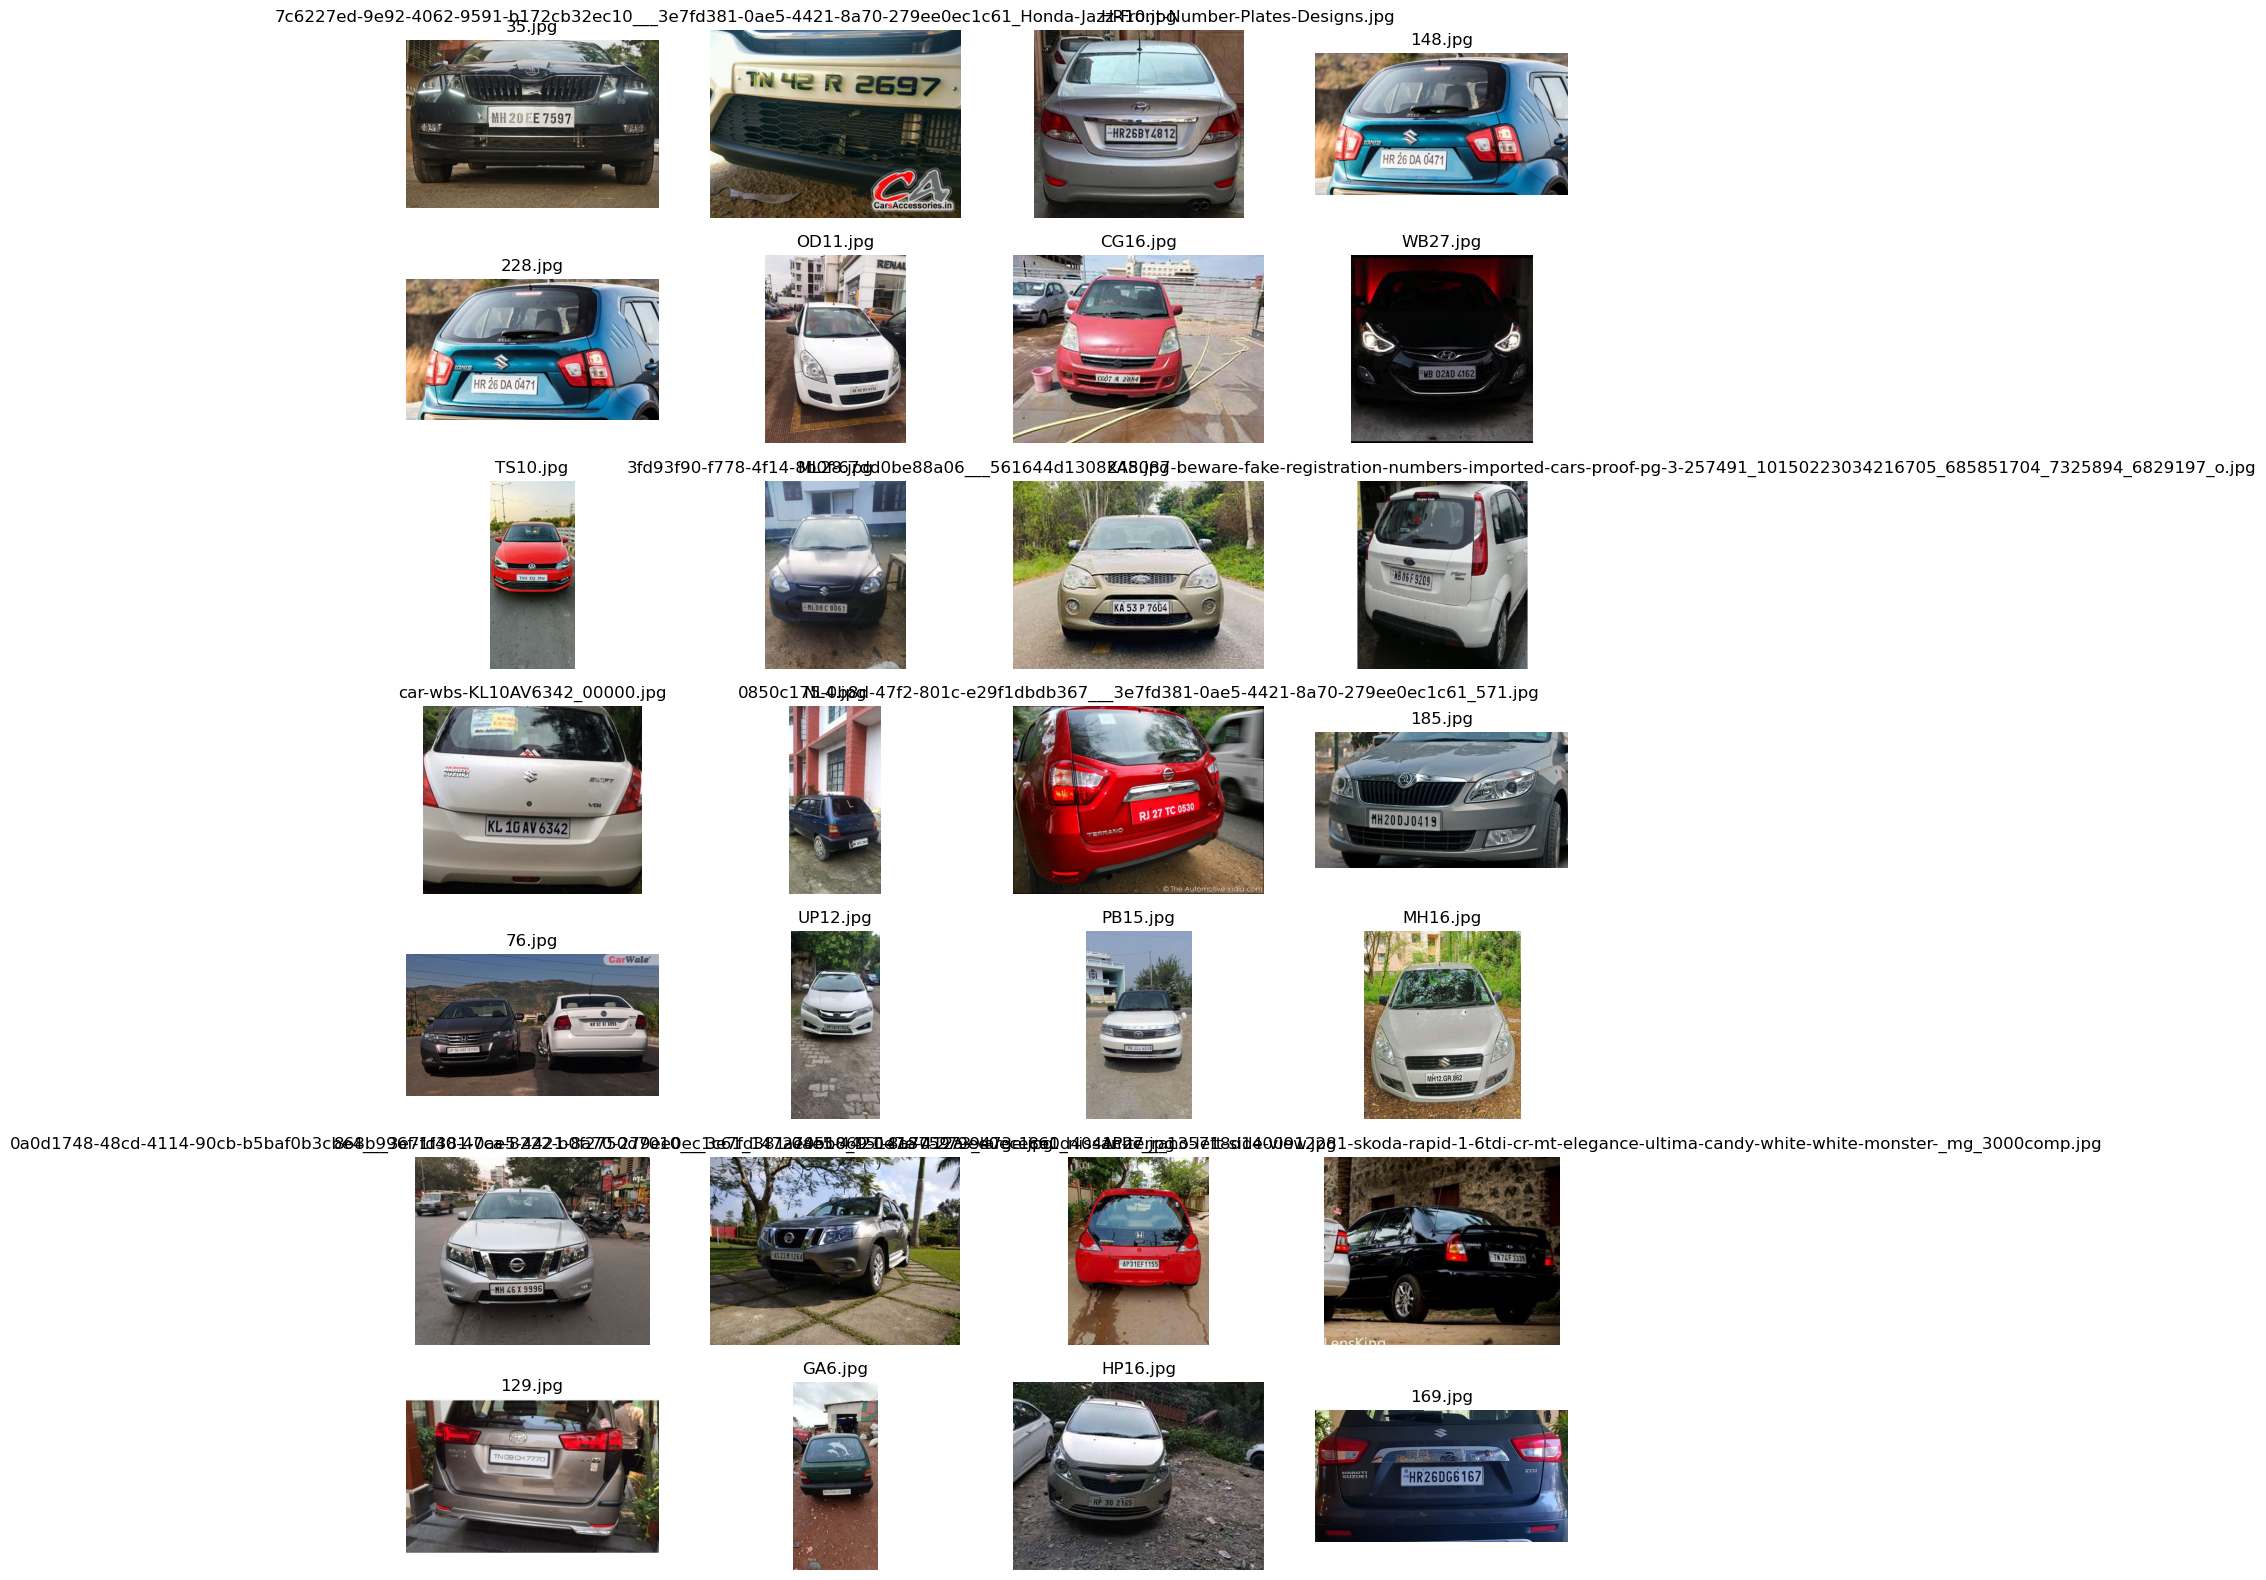

In [30]:
show_images(IMAGE_PATHS[:30], IMAGE_NAMES[:30], figsize=(15, 20))

In [43]:
!python utils/xml_to_csv.py -i {IMAGE_DIR} -o {LABELS_CSV}

Successfully converted xml to csv.


In [44]:
TRAIN_SIZE = 0.8

In [45]:
!python utils/generate_tfrecord.py --train_size={TRAIN_SIZE} --csv_input={LABELS_CSV} --img_path={IMAGE_DIR} --output_path={OUTPUT_DIR}

2023-01-13 04:37:57.305762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 04:37:57.397921: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 04:37:57.865545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 04:37:57.865589: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 